In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from warnings import filterwarnings as filt
%matplotlib inline

# 0 Описание задачи
Музыка важная часть нашей жизни с давних времен. У каждого исполнителя есть свой стиль, делающий музыку искусством. Этот набор данных получен с одного из хакатонов Machinehack на основе 17 996 треков. Работа решает задачу классификации стиля музыки, таких как Поп, Инди, Хип-хоп и тд.

# 1 Чтение данных

In [2]:
url = 'https://github.com/bakaevam/machine-learning-course-2021/raw/main/music_genre.csv'
data = pd.read_csv(url, sep = ',', skipinitialspace = True)
data.shape

(17996, 17)

Таблица содержит информацию о 18 тыс различных песен

In [3]:
data.head()

Artist Name                             Track Name  Popularity  \
0             Bruno Mars  That's What I Like (feat. Gucci Mane)        60.0   
1                 Boston                           Hitch a Ride        54.0   
2          The Raincoats                     No Side to Fall In        35.0   
3                   Deno             Lingo (feat. J.I & Chunkz)        66.0   
4  Red Hot Chili Peppers      Nobody Weird Like Me - Remastered        53.0   

   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.854   0.564   1.0    -4.964     1       0.0485      0.017100   
1         0.382   0.814   3.0    -7.230     1       0.0406      0.001100   
2         0.434   0.614   6.0    -8.334     1       0.0525      0.486000   
3         0.853   0.597  10.0    -6.528     0       0.0555      0.021200   
4         0.167   0.975   2.0    -4.279     1       0.2160      0.000169   

   instrumentalness  liveness  valence    tempo  duration_in min/ms  \
0               NaN    0.0849   0.8990  134.071            234596.0   
1          0.004010    0.1010   0.5690  116.454            251733.0   
2          0.000196    0.3940   0.7870  147.681            109667.0   
3               NaN    0.1220   0.5690  107.033            173968.0   
4          0.016100    0.1720   0.0918  199.060            229960.0   

   time_signature  Class  
0               4      5  
1               4     10  
2               4      6  
3               4      5  
4               4     10

Каждая песня охарактеризована 17 признаками( будем считать, что Название песни не признак, тк по нему про стиль песни ничего сказать нельзя). Среди признаков есть категориальные (Класс, Имя артиста) и все остальные числовые.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

Рассмотрим детально каждый признак:

0. Artist Name - имя исполнителя
1. Track Name - название трека
2. Popularity - популярность трека
3. Danceability - танцевальность
4. Energy - энергия
5. Key - ключ (группа тонов)
6. Loudness - громкость
7. Mode - настроение
8. Speechiness - наличие слов в треке
9. Acousticness - акустичность
10. Instrumentalness - инструментальность
11. Liveness - живость
12. Valence - значимость (музыкальная позитивность)
13. Tempo - темп
14. Duration_in min/ms - длительность в миллисекундах
15. Time_signature - значение времени (сколько ударов содержится в такте)
16. Class - стиль музыки

    0.Acoustic Folk - Акустический фолк
    
    1.Alt Music - Альтернативная музыка
    
    2.Blues - блюз
    
    3.Bollywood Music - музыка Болливуда
    
    4.Country Music - Кантри
    
    5.HipHop Music - Хип-хоп
    
    6.Indie Music - Инди
    
    7.Instrumental Music - Инструментальная
    
    8.Metal Music 
    
    9.Pop Music
    
    10.Rock Music

In [5]:
data.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [6]:
data['Artist Name'] = data['Artist Name'].astype('category')
data['Class'] = data['Class'].astype('category')

# 2 Визуализация и основные характеристики

Получаем информацию о количественных признаках

In [7]:
data.describe()

Popularity  danceability        energy           key      loudness  \
count  17568.000000  17996.000000  17996.000000  15982.000000  17996.000000   
mean      44.512124      0.543433      0.662777      5.952447     -7.910660   
std       17.426928      0.166268      0.235373      3.196854      4.049151   
min        1.000000      0.059600      0.000020      1.000000    -39.952000   
25%       33.000000      0.432000      0.509000      3.000000     -9.538000   
50%       44.000000      0.545000      0.700000      6.000000     -7.016000   
75%       56.000000      0.659000      0.860000      9.000000     -5.189000   
max      100.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      13619.000000   
mean       0.636753      0.079707      0.247082          0.177562   
std        0.480949      0.083576      0.310632          0.304048   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034800      0.004300          0.000089   
50%        1.000000      0.047400      0.081400          0.003910   
75%        1.000000      0.083000      0.434000          0.200000   
max        1.000000      0.955000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  17996.000000  17996.000000  17996.000000        1.799600e+04   
mean       0.196170      0.486208    122.623294        2.007445e+05   
std        0.159212      0.240195     29.571527        1.119891e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.097500      0.297000     99.620750        1.663370e+05   
50%        0.129000      0.481000    120.065500        2.091600e+05   
75%        0.258000      0.672000    141.969250        2.524900e+05   
max        1.000000      0.986000    217.416000        1.477187e+06   

       time_signature  
count    17996.000000  
mean         3.924039  
std          0.361618  
min          1.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

Count - Количество значений для каждого признака. Заметим, что у каждого большинства признаков это число равно 17996, кроме признаков "Популярность" - 17568, "Ключ" - 15982, "Инструментальность" - 13619. То есть эти признаки имеют пропущенные значения (428, 2014, 4377 соответственно). Получается это 2.37%, 11.19% и 24.32% от всех данных соответственно.

Mean - Средние значения.

STD - Стандартные отклонения. Данная константа показывает, на сколько в среднем отклоняются варианты от среднего значения.

Min/Max - Минимальные/Максимальные значения.

25%, 75% - Пертвый и третий квартили. То есть это значения, которые объект не превышает с вероятностью 25% и 75% соответственно.

50% - Квартиль 50% или медиана.

Рассмотрим некоторые признаки отдельно

Популярность трека оценивается от 1 до 100 и основывается на количестве прослушиваний трека и на сколько свежи эти прослушивания. Средняя оценка популярности - 44.5. Учитывая среднее отклонение 17, можно сказать, что большинство треков имеют популярность от 28 до 62.

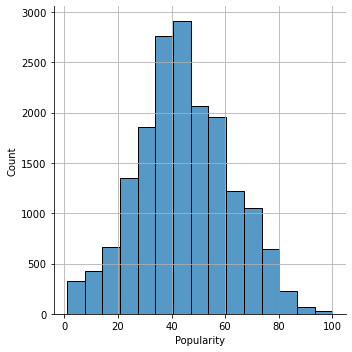

In [8]:
sns.displot(data['Popularity'], bins=15)
plt.grid()
pass

Энергичность оценивается от 0 до 1, где 1 - очень энергичный трек. Среднее значение энергичности - 0.66, что является достаточно энергичным треком. На гистограмме видно, что большая часть выборки находится у значений 0.85 - 1.

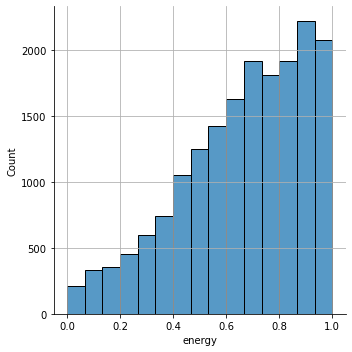

In [9]:
sns.displot(data['energy'], bins=15)
plt.grid()
pass

In [10]:
data.describe(include=['category'])

Artist Name  Class
count             17996  17996
unique             9149     11
top     Backstreet Boys     10
freq                 69   4949

Рассмотрим категориальные признаки:

Count - Количество значений. Все признаки имеют одинаковое количество значений, то есть пропущенных значений нет

Unique - Количество уникальных значений.

Top - Наиболее встречающееся значение. 

Freq - Частота наиболее встречающегося значения.

Чтобы вычислить связи между признакми, построим матрицу корреляции

In [11]:
corr_matrix = data.corr()
corr_matrix

Popularity  danceability    energy       key  loudness  \
Popularity            1.000000      0.167213  0.051538  0.005901  0.124915   
danceability          0.167213      1.000000 -0.093838  0.006702  0.059723   
energy                0.051538     -0.093838  1.000000  0.015934  0.767869   
key                   0.005901      0.006702  0.015934  1.000000  0.002660   
loudness              0.124915      0.059723  0.767869  0.002660  1.000000   
mode                  0.016584     -0.067135 -0.035880 -0.112452 -0.033650   
speechiness           0.031664      0.199042  0.125427  0.001822  0.096027   
acousticness         -0.125410      0.009055 -0.745963 -0.009112 -0.612824   
instrumentalness     -0.167661     -0.200752 -0.180276  0.001411 -0.343672   
liveness             -0.072298     -0.109485  0.195634  0.015125  0.112022   
valence               0.054824      0.444548  0.222998  0.031744  0.181086   
tempo                -0.006050     -0.183527  0.210224  0.013965  0.164272   
duration_in min/ms   -0.031118     -0.121624  0.245768  0.014547  0.172010   
time_signature        0.067062      0.137455  0.145281  0.006965  0.127775   

                        mode  speechiness  acousticness  instrumentalness  \
Popularity          0.016584     0.031664     -0.125410         -0.167661   
danceability       -0.067135     0.199042      0.009055         -0.200752   
energy             -0.035880     0.125427     -0.745963         -0.180276   
key                -0.112452     0.001822     -0.009112          0.001411   
loudness           -0.033650     0.096027     -0.612824         -0.343672   
mode                1.000000    -0.074609      0.024035         -0.026771   
speechiness        -0.074609     1.000000     -0.086648         -0.067632   
acousticness        0.024035    -0.086648      1.000000          0.174139   
instrumentalness   -0.026771    -0.067632      0.174139          1.000000   
liveness           -0.001563     0.070406     -0.111393         -0.047189   
valence            -0.002986     0.053885     -0.122547         -0.228144   
tempo               0.021211     0.048948     -0.168318         -0.038586   
duration_in min/ms -0.069307     0.005044     -0.322583         -0.004551   
time_signature     -0.019989     0.056237     -0.133936         -0.061745   

                    liveness   valence     tempo  duration_in min/ms  \
Popularity         -0.072298  0.054824 -0.006050           -0.031118   
danceability       -0.109485  0.444548 -0.183527           -0.121624   
energy              0.195634  0.222998  0.210224            0.245768   
key                 0.015125  0.031744  0.013965            0.014547   
loudness            0.112022  0.181086  0.164272            0.172010   
mode               -0.001563 -0.002986  0.021211           -0.069307   
speechiness         0.070406  0.053885  0.048948            0.005044   
acousticness       -0.111393 -0.122547 -0.168318           -0.322583   
instrumentalness   -0.047189 -0.228144 -0.038586           -0.004551   
liveness            1.000000  0.021076  0.033515            0.053885   
valence             0.021076  1.000000  0.051128           -0.097126   
tempo               0.033515  0.051128  1.000000            0.045133   
duration_in min/ms  0.053885 -0.097126  0.045133            1.000000   
time_signature      0.021546  0.112479 -0.034642            0.007411   

                    time_signature  
Popularity                0.067062  
danceability              0.137455  
energy                    0.145281  
key                       0.006965  
loudness                  0.127775  
mode                     -0.019989  
speechiness               0.056237  
acousticness             -0.133936  
instrumentalness         -0.061745  
liveness                  0.021546  
valence                   0.112479  
tempo                    -0.034642  
duration_in min/ms        0.007411  
time_signature            1.000000

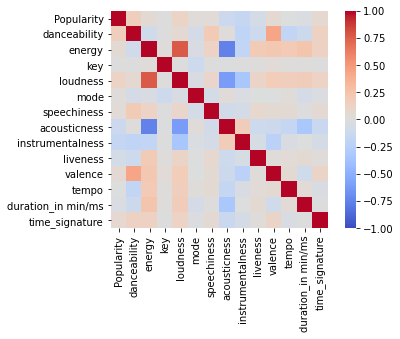

In [12]:
sns.heatmap(corr_matrix, square=True, cmap='coolwarm', vmin = -1, vmax = 1)
pass

На визуальном образе матрицы корреляции видно, что Энергичность и Громкость имеют коэффициент больше 0.7, это говорит о сильной положительной связи.

In [13]:
(abs(corr_matrix) < 0.7) & (abs(corr_matrix) >= 0.3)

Popularity  danceability  energy    key  loudness   mode  \
Popularity               False         False   False  False     False  False   
danceability             False         False   False  False     False  False   
energy                   False         False   False  False     False  False   
key                      False         False   False  False     False  False   
loudness                 False         False   False  False     False  False   
mode                     False         False   False  False     False  False   
speechiness              False         False   False  False     False  False   
acousticness             False         False   False  False      True  False   
instrumentalness         False         False   False  False      True  False   
liveness                 False         False   False  False     False  False   
valence                  False          True   False  False     False  False   
tempo                    False         False   False  False     False  False   
duration_in min/ms       False         False   False  False     False  False   
time_signature           False         False   False  False     False  False   

                    speechiness  acousticness  instrumentalness  liveness  \
Popularity                False         False             False     False   
danceability              False         False             False     False   
energy                    False         False             False     False   
key                       False         False             False     False   
loudness                  False          True              True     False   
mode                      False         False             False     False   
speechiness               False         False             False     False   
acousticness              False         False             False     False   
instrumentalness          False         False             False     False   
liveness                  False         False             False     False   
valence                   False         False             False     False   
tempo                     False         False             False     False   
duration_in min/ms        False          True             False     False   
time_signature            False         False             False     False   

                    valence  tempo  duration_in min/ms  time_signature  
Popularity            False  False               False           False  
danceability           True  False               False           False  
energy                False  False               False           False  
key                   False  False               False           False  
loudness              False  False               False           False  
mode                  False  False               False           False  
speechiness           False  False               False           False  
acousticness          False  False                True           False  
instrumentalness      False  False               False           False  
liveness              False  False               False           False  
valence               False  False               False           False  
tempo                 False  False               False           False  
duration_in min/ms    False  False               False           False  
time_signature        False  False               False           False

Средней связью обладают пары признаков - Танцевальность и Позитивность музыки, Акустичность и Длительность трека, Громкость и Акустичность/Инструментальность. Все остальные признаки имеют слабую связь.

Рассмотрим категориальные признаки

In [14]:
data['Artist Name'].value_counts()

Backstreet Boys                               69
Westlife                                      60
Britney Spears                                54
Eyal Golan                                    48
Omer Adam                                     48
                                              ..
Jax                                            1
Javi That's Me                                 1
Javed-Mohsin, Arijit Singh, Shreya Ghoshal     1
Javed Bashir, Junaid Bashir                    1
◊†◊ê◊ì◊î                                       1
Name: Artist Name, Length: 9149, dtype: int64

В данной выборке больше всего треков группы Backstreet Boys

In [15]:
data['Class'].value_counts()

10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: Class, dtype: int64

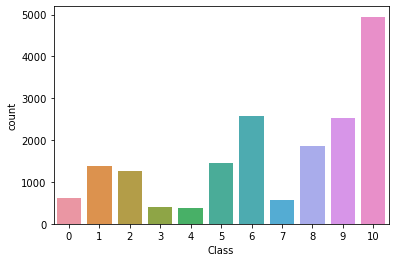

In [16]:
sns.countplot(x='Class', data=data)
pass

Топ 3 стилей музыки составляет - Рок, Инди и Поп музыка.

Посмотрим на всевозможные диаграммы рассеивания для каждой пары признаков (возьмем случайные 10%)

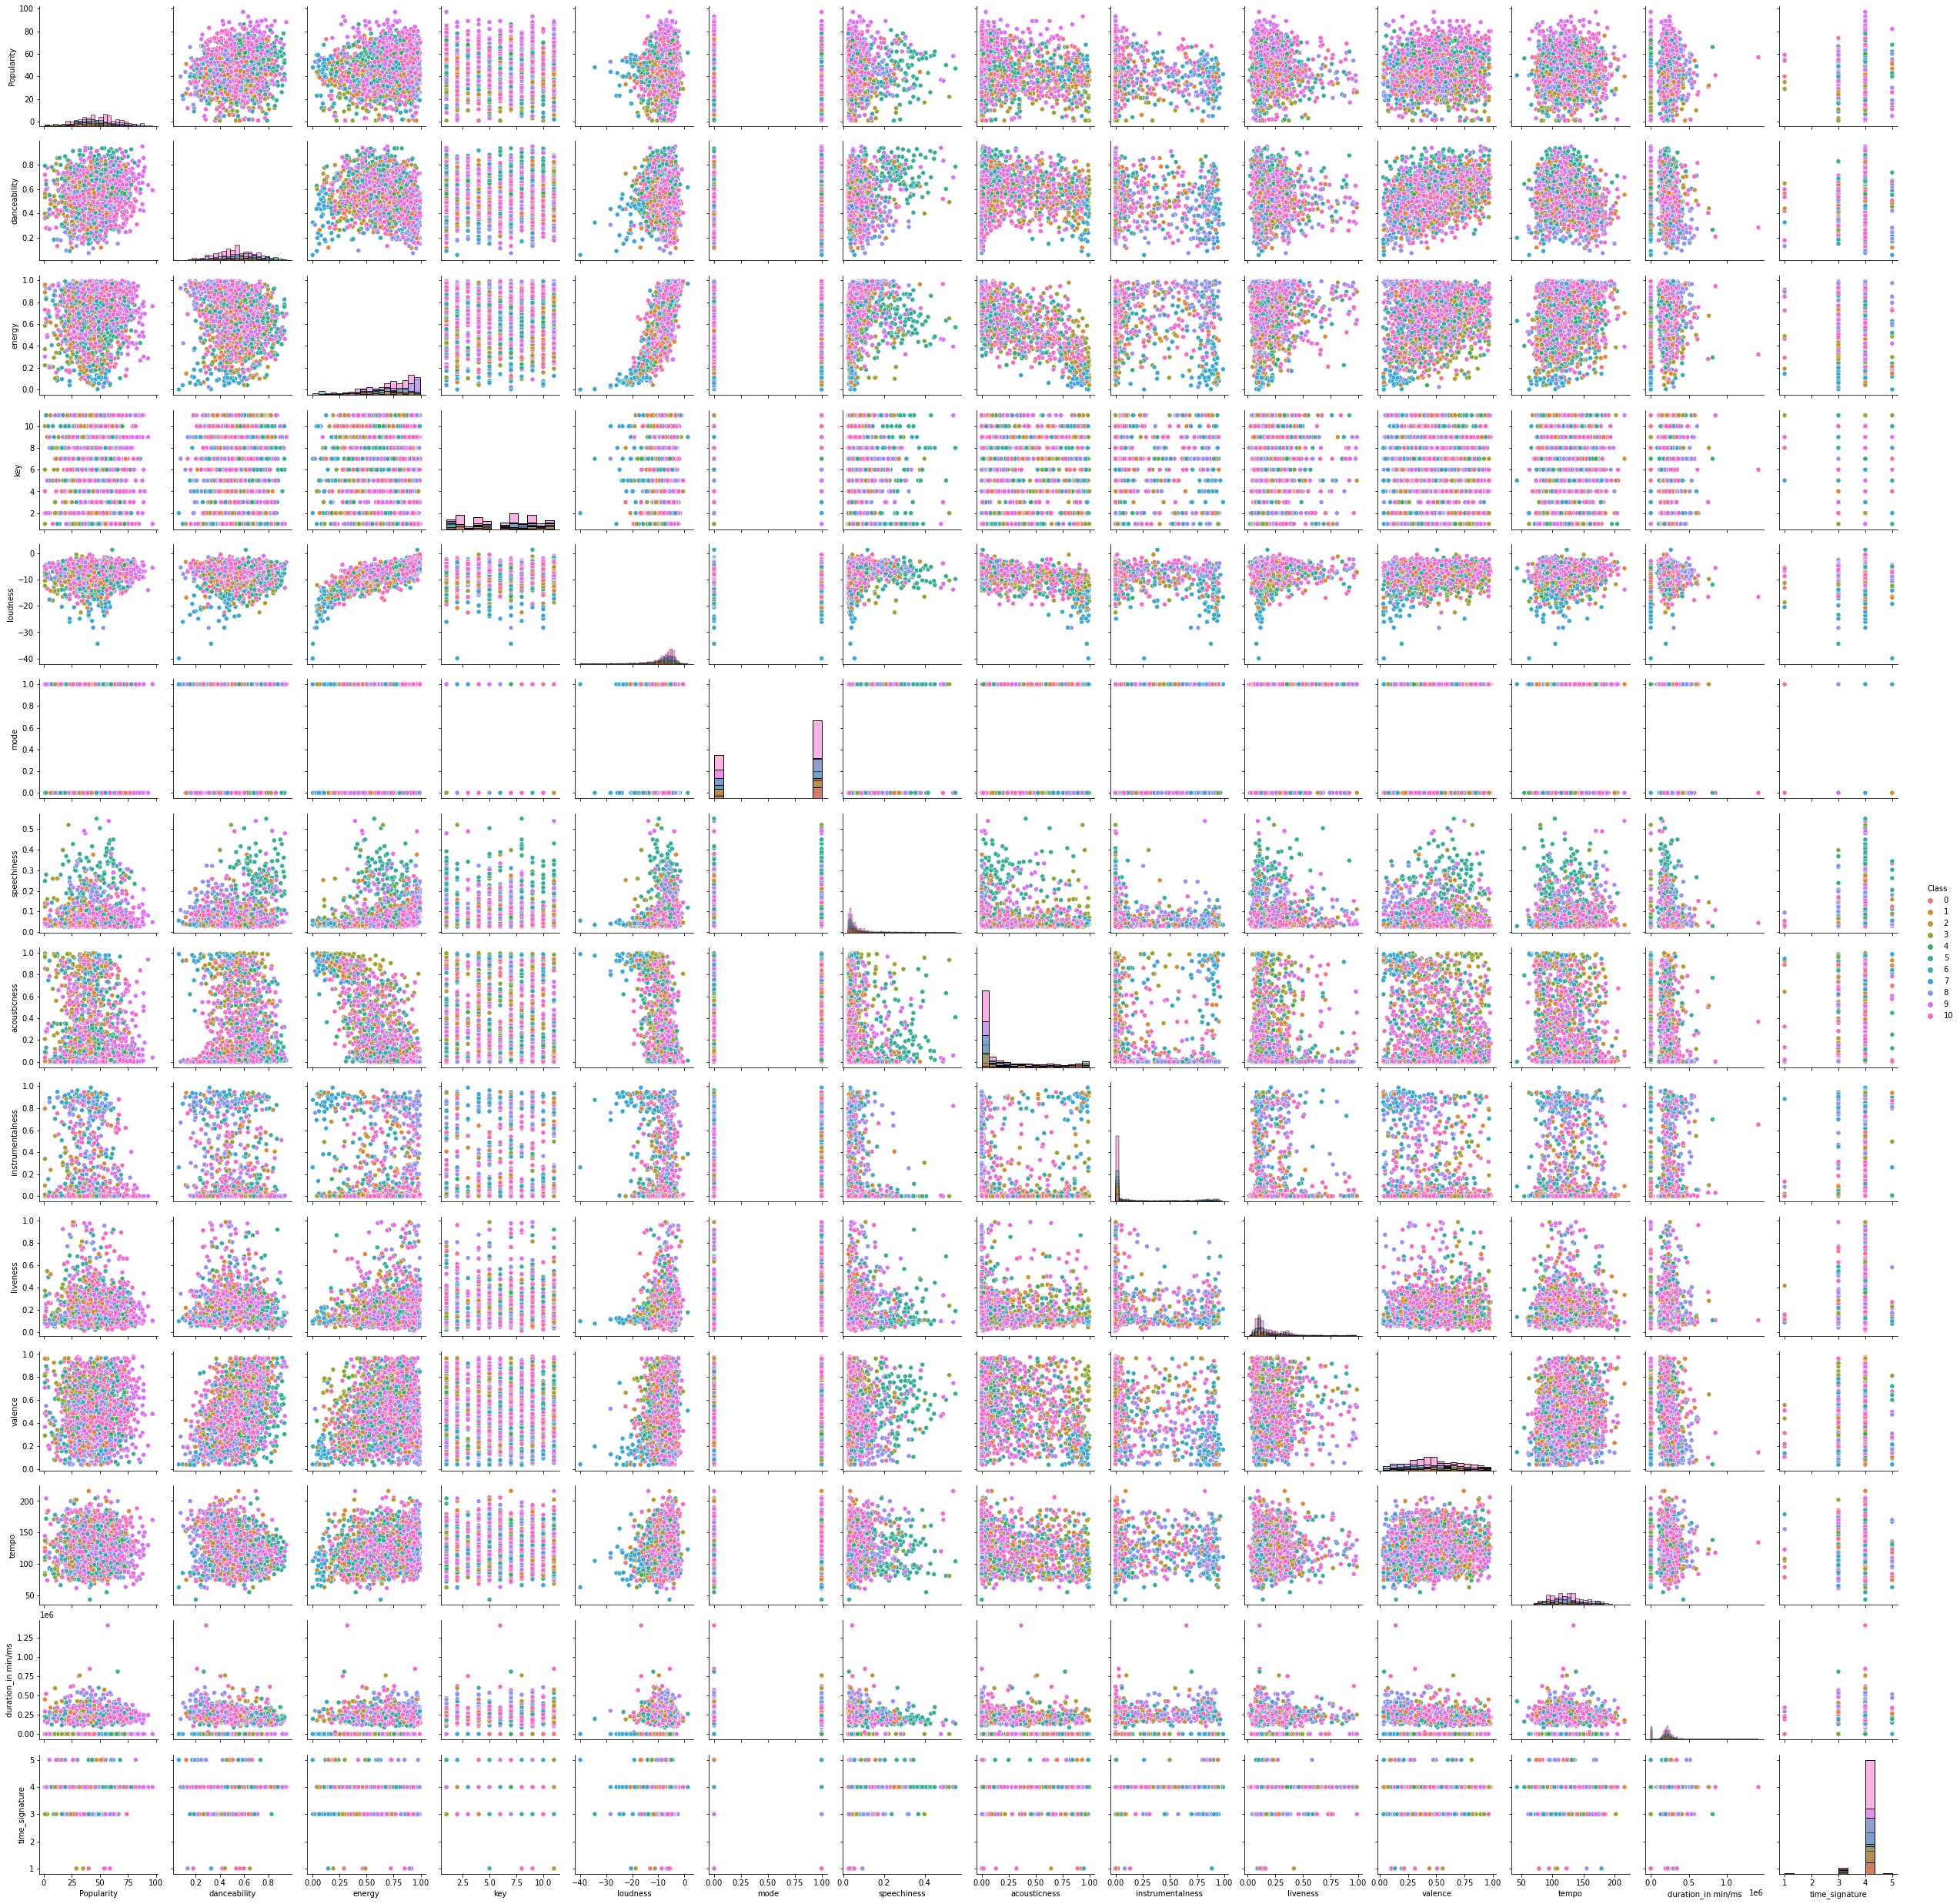

In [17]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=int(0.1 * data.shape[0]), replace=False)
sns.pairplot(data.iloc[random_subset], hue='Class', diag_kind='hist')

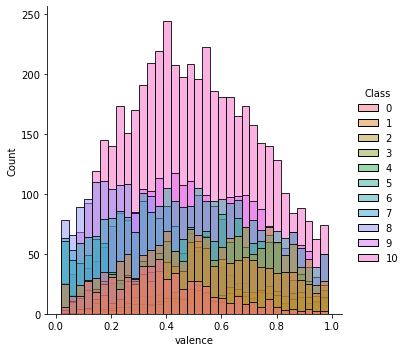

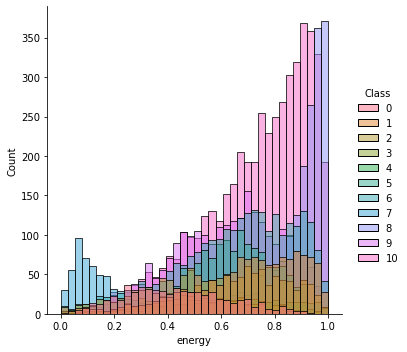

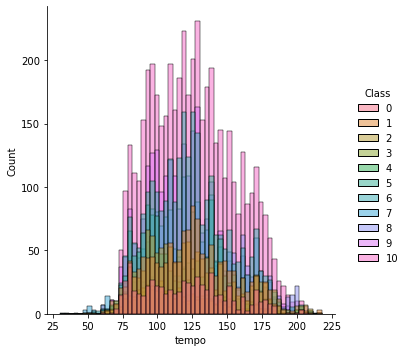

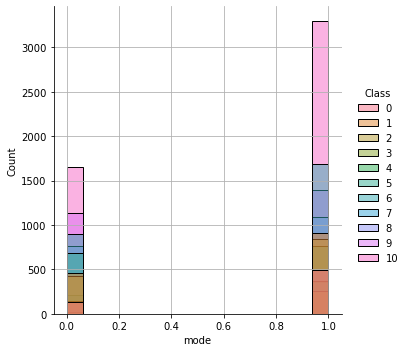

In [18]:
features = ['valence', 'energy', 'tempo', 'mode']

for i, feature in enumerate(features):
    sns.displot(data=data, x=feature, kind='hist', hue='Class')
    
plt.grid()

# 4 Обработка категориальных признаков

Закодируем категориальные признаки с помощью чисел, но до этого избавимся от столбца Имя Трека.

In [19]:
data = data.drop (['Track Name'], axis=1) 
data['Class'] = data['Class'].astype('object')
object_cols = data.select_dtypes("category").columns
for col in object_cols:
    data = pd.concat((data, pd.get_dummies(data[col])), axis=1)
    data = data.drop([col], axis=1)
data.head()

Popularity  danceability  energy   key  loudness  mode  speechiness  \
0        60.0         0.854   0.564   1.0    -4.964     1       0.0485   
1        54.0         0.382   0.814   3.0    -7.230     1       0.0406   
2        35.0         0.434   0.614   6.0    -8.334     1       0.0525   
3        66.0         0.853   0.597  10.0    -6.528     0       0.0555   
4        53.0         0.167   0.975   2.0    -4.279     1       0.2160   

   acousticness  instrumentalness  liveness  ...  ◊ï◊ô◊™◊®◊™◊ô  ◊ò◊ú ◊ê◊ï◊®◊ü  \
0      0.017100               NaN    0.0849  ...             0              0   
1      0.001100          0.004010    0.1010  ...             0              0   
2      0.486000          0.000196    0.3940  ...             0              0   
3      0.021200               NaN    0.1220  ...             0              0   
4      0.000169          0.016100    0.1720  ...             0              0   

   ◊ó◊†◊ü ◊ë◊ü ◊ê◊®◊ô  ◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù ◊ô◊ï◊í◊ë ◊í◊ú◊ï◊°◊û◊ü  \
0                   0                           0                     0   
1                   0                           0                     0   
2                   0                           0                     0   
3                   0                           0                     0   
4                   0                           0                     0   

   ◊ú◊ô◊ú ◊ê◊® ◊§◊ô ◊í'◊ô  ◊û◊ê◊ô◊õ◊ï  ◊û◊ô◊†◊ï◊° ◊ê◊§◊°  ◊û◊õ◊ú◊ï◊£  ◊†◊ê◊ì◊î  
0                       0           0                  0           0         0  
1                       0           0                  0           0         0  
2                       0           0                  0           0         0  
3                       0           0                  0           0         0  
4                       0           0                  0           0         0  

[5 rows x 9164 columns]

# 3 Обработка пропущенных значений

Для признаков с большим процентом пропущенных значений ( Ключ, Популярность и Инструментальность) заполним данные мадианными значениями.

In [20]:
data.median(axis = 0)

Popularity                44.000
danceability               0.545
energy                     0.700
key                        6.000
loudness                  -7.016
                           ...  
◊ú◊ô◊ú ◊ê◊® ◊§◊ô ◊í'◊ô     0.000
◊û◊ê◊ô◊õ◊ï                 0.000
◊û◊ô◊†◊ï◊° ◊ê◊§◊°          0.000
◊û◊õ◊ú◊ï◊£                 0.000
◊†◊ê◊ì◊î                   0.000
Length: 9164, dtype: float64

In [21]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [22]:
data.isna().sum()

Popularity                0
danceability              0
energy                    0
key                       0
loudness                  0
                         ..
◊ú◊ô◊ú ◊ê◊® ◊§◊ô ◊í'◊ô    0
◊û◊ê◊ô◊õ◊ï                0
◊û◊ô◊†◊ï◊° ◊ê◊§◊°         0
◊û◊õ◊ú◊ï◊£                0
◊†◊ê◊ì◊î                  0
Length: 9164, dtype: int64

# 5 Нормализация

In [23]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))

data_columns = data.columns
d = scaler.fit_transform(data)

scaled_df = pd.DataFrame(d, columns=data_columns)

scaled_df.describe()

Popularity  danceability        energy           key      loudness  \
count  17996.000000  17996.000000  17996.000000  17996.000000  17996.000000   
mean       0.878787      1.041173      1.325540      0.991554      1.551376   
std        0.347851      0.357797      0.470756      0.602538      0.196052   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.646465      0.801377      1.017980      0.600000      1.472583   
50%        0.868687      1.044545      1.399988      1.000000      1.594693   
75%        1.111111      1.289864      1.719994      1.400000      1.683153   
max        2.000000      2.000000      2.000000      2.000000      2.000000   

               mode   speechiness  acousticness  instrumentalness  \
count  17996.000000  17996.000000  17996.000000      17996.000000   
mean       1.273505      0.122696      0.496148          0.271738   
std        0.961897      0.179252      0.623760          0.551791   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.026381      0.008635          0.000588   
50%        2.000000      0.053405      0.163454          0.007849   
75%        2.000000      0.129759      0.871486          0.113653   
max        2.000000      2.000000      2.000000          2.000000   

           liveness  ...  ◊ï◊ô◊™◊®◊™◊ô  ◊ò◊ú ◊ê◊ï◊®◊ü  ◊ó◊†◊ü ◊ë◊ü ◊ê◊®◊ô  \
count  17996.000000  ...  17996.000000   17996.000000        17996.000000   
mean       0.372978  ...      0.000111       0.000111            0.000111   
std        0.322258  ...      0.014909       0.014909            0.014909   
min        0.000000  ...      0.000000       0.000000            0.000000   
25%        0.173262  ...      0.000000       0.000000            0.000000   
50%        0.237021  ...      0.000000       0.000000            0.000000   
75%        0.498128  ...      0.000000       0.000000            0.000000   
max        2.000000  ...      2.000000       2.000000            2.000000   

       ◊ô◊ï◊¶◊®◊ï◊™ ◊ê◊™ ◊î◊ë◊ï◊ù  ◊ô◊ï◊í◊ë ◊í◊ú◊ï◊°◊û◊ü  \
count                17996.000000           17996.000000   
mean                     0.000111               0.000111   
std                      0.014909               0.014909   
min                      0.000000               0.000000   
25%                      0.000000               0.000000   
50%                      0.000000               0.000000   
75%                      0.000000               0.000000   
max                      2.000000               2.000000   

       ◊ú◊ô◊ú ◊ê◊® ◊§◊ô ◊í'◊ô    ◊û◊ê◊ô◊õ◊ï  ◊û◊ô◊†◊ï◊° ◊ê◊§◊°    ◊û◊õ◊ú◊ï◊£  \
count            17996.000000  17996.000000       17996.000000  17996.000000   
mean                 0.000111      0.000222           0.000222      0.000111   
std                  0.014909      0.021084           0.021084      0.014909   
min                  0.000000      0.000000           0.000000      0.000000   
25%                  0.000000      0.000000           0.000000      0.000000   
50%                  0.000000      0.000000           0.000000      0.000000   
75%                  0.000000      0.000000           0.000000      0.000000   
max                  2.000000      2.000000           2.000000      2.000000   

           ◊†◊ê◊ì◊î  
count  17996.000000  
mean       0.000111  
std        0.014909  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        2.000000  

[8 rows x 9164 columns]

# 6 Разбиение на обучающую и тестовую выборки

Для определения стиля трека будем использовать все признаки

In [24]:
X = scaled_df.drop (['Class'], axis=1) 
y = data['Class']

Разобьем данные на обучающую (75%) и тестовую (25%) выборки:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(13497, 4499)

# 7 Обучение модели

## Метод k ближайших соседей

Используем классификатор с количеством соседей по умолчанию, а потом воспользуемся подбором параметра.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
knn_training_predict = 100 * knn_default.score(X_train, y_train)
knn_test_predict = 100 * knn_default.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 69.50%, Test: 51.72%. 


In [27]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.48343870631194574 15


In [28]:
knn_15 = KNeighborsClassifier(n_neighbors = 15)
knn_15.fit(X_train, y_train)
knn_training_predict = 100 * knn_15.score(X_train, y_train)
knn_test_predict = 100 * knn_15.score(X_test, y_test)
print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_predict, knn_test_predict))

Accuracy. Train : 59.42%, Test: 51.81%. 


Подбор параметров показал, что точность модели для 15 ближайших соседей показывают оптимальные результаты для данных выборок.

Вычислим среднеквадратическую ошибку для алгоритма с оптимальным количеством соседей

In [29]:
knn_train_predict = knn_15.score(X_train, y_train)
knn_test_predict = knn_15.score(X_test, y_test)

MSE_train = np.mean((knn_train_predict - y_train)**2)
MSE_test  = np.mean((knn_test_predict - y_test)**2)
print("MSE. Train : {:.2f}, Test: {:.2f}. ".format(MSE_train, MSE_test))

MSE. Train : 47.51, Test: 48.44. 


# 8 Выводы

Был проведен анализ данных музыкальных треков и решена задача классификации(определение стиля музыки) с помощью модели, натренерованной методом k ближайших соседей. Для этого были проанализированы статистические характеристики, данные проверены на пропущенные значения и в дальнешем заменены на медианные значения. Котегориальным признакам были присвоены целочисленные значения, проведена нормализация в диапозоне от 0 до 2. Данные были разбиты на обучающую и тестовую выборки. Модель была обучена методом k ближайших соседей, но результаты точности в итоге получились не очень хорошими. В попытке улучшить точность, были проведены эксперименты с нормализацией(ее отсутствие и разные диапозоны), но это приводило лишь к незначительным улучшениям. К сожалению добиться точности около 90% не удалось.